# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation, Input, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10, cifar100

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading cifar Image

In [2]:
(xtrain, ytrain),(xtest, ytest) = cifar10.load_data()

In [3]:
xtest[1]

array([[[235, 235, 235],
        [231, 231, 231],
        [232, 232, 232],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [232, 232, 232]],

       [[238, 238, 238],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [235, 235, 235]],

       [[237, 237, 237],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [234, 234, 234]],

       ...,

       [[ 87,  99,  89],
        [ 43,  51,  37],
        [ 19,  23,  11],
        ...,
        [169, 184, 179],
        [182, 197, 193],
        [188, 202, 201]],

       [[ 82,  96,  82],
        [ 46,  57,  36],
        [ 36,  44,  22],
        ...,
        [174, 189, 183],
        [185, 200, 196],
        [187, 202, 200]],

       [[ 85, 101,  83],
        [ 62,  75,  48],
        [ 58,  67,  38],
        ...,
        [168, 183, 178],
        [180, 195, 191],
        [186, 200, 199]]

# Single Image

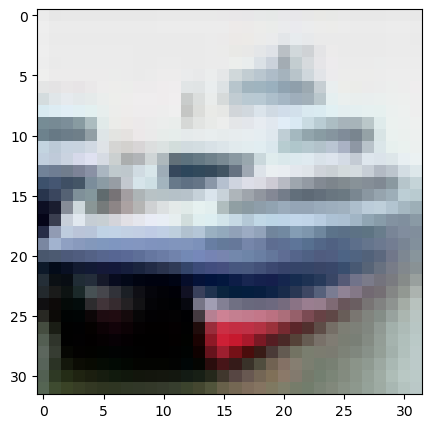

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(xtest[1]) # showing image from xtest's index 1
plt.show()

In [5]:
xtest.shape # 10000 samples, (32*32 image), RGB Channel 3

(10000, 32, 32, 3)

In [6]:
(xtrain, ytrain), _ = cifar10.load_data() #if you want to ignore test samples

In [7]:
xtrain

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
xtrain.shape

(50000, 32, 32, 3)

In [9]:
xtrain.shape

(50000, 32, 32, 3)

In [10]:
xtest.shape

(10000, 32, 32, 3)

# Plotting Samples

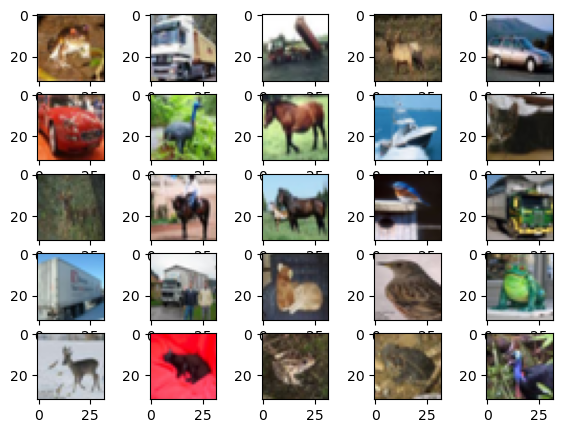

In [11]:
figs = plt.figure(figsize=(7, 5))
for x in range(25):
    figs.add_subplot(5,5, x+1) # 5*5=25 samples in total
    plt.imshow(xtrain[x])
plt.show()

# Tensor

In machine learning, a tensor is a multi-dimensional array of numerical values that can be used to represent data or intermediate computations in a neural network. Tensors are a fundamental data structure used in deep learning frameworks like TensorFlow and PyTorch.

A tensor can have any number of dimensions, which are also referred to as axes or ranks. The number of dimensions is called the tensor's rank. A tensor with one dimension is called a vector, a tensor with two dimensions is called a matrix, and a tensor with three or more dimensions is called a multi-dimensional tensor.

For example, a tensor of shape (3, 4) represents a matrix with 3 rows and 4 columns. A tensor of shape (2, 3, 4) represents a 3D tensor with 2 "layers", each having 3 rows and 4 columns.

# Filter

In convolutional neural networks (CNNs), filters (also known as kernels or weights) are learnable matrices used to extract features from input data.

Filters are used in the convolutional layers of a CNN to apply a sliding window over the input data and perform a mathematical operation called convolution. During training, the filters are learned and optimized to detect specific features or patterns in the input data.

For example, in an image classification task, the first few convolutional layers of a CNN might learn simple filters such as edges and corners, while later layers learn more complex features like textures and shapes.

Filters can be of any size, depending on the complexity of the features to be learned. A larger filter can capture more complex features, but also increases the number of parameters in the network and requires more computational resources during training and inference.

The number of filters used in a convolutional layer determines the number of output channels in the layer. Each filter produces a single output channel, and the number of filters determines how many channels are produced.

Filters can be visualized as 2D matrices or 3D tensors, where the first two dimensions represent the filter size and the third dimension represents the number of input channels (for a 2D convolution) or the number of output channels (for a 3D convolution).

# Padding

In Convolutional Neural Networks (CNNs), padding is the process of adding additional rows and columns of zeros to the input image before the convolution operation is performed. This is done to preserve the spatial dimensions of the input image and to control the size of the output feature maps.

There are two types of padding in CNNs:

Valid Padding: Valid padding (also known as "no padding") refers to the absence of padding. In this case, the convolution operation is performed only on the valid positions of the input image. Therefore, the output feature maps are smaller than the input image.

Same Padding: Same padding (also known as "zero padding") refers to adding enough padding to the input image so that the output feature maps have the same spatial dimensions as the input image. This is achieved by adding an equal number of zeros to the top, bottom, left, and right of the input image.

# Strides

In convolutional neural networks (CNNs), strides refer to the step size used to slide the filter over the input data during convolution. The stride determines the amount by which the filter is shifted horizontally and vertically for each step, which in turn affects the size of the output feature maps.

When the stride is set to 1, the filter slides over the input data one pixel at a time, which results in output feature maps with the same spatial dimensions as the input data (assuming same padding is used).

When the stride is set to a value greater than 1, the filter skips over some pixels in the input data, which reduces the size of the output feature maps. For example, a stride of 2 means that the filter shifts two pixels at a time, which results in output feature maps with half the spatial dimensions of the input data (assuming same padding is used).

Increasing the stride size can be useful for reducing the computational cost of the CNN, as it reduces the number of operations needed to process the input data. However, using larger stride sizes can also result in loss of information and reduced accuracy, as it reduces the resolution of the output feature maps.

The choice of stride size depends on the specific task and the complexity of the input data. A larger stride size may be appropriate for simpler features, while a smaller stride size may be necessary for more complex features. Experimentation with different stride sizes and architectures is often necessary to find the optimal configuration for a given problem.

# Input Shape

In machine learning, the input_shape parameter is used to specify the shape of the input data for a neural network. It is commonly used in deep learning frameworks such as TensorFlow and Keras.

The input_shape parameter is a tuple that specifies the dimensions of the input data. The number of elements in the tuple depends on the number of dimensions in the input data. For example, if the input data is a 2D matrix, the input_shape parameter will be a tuple with two elements: the number of rows and the number of columns.

# Keras.Models

In Keras, keras.models module contains the core components for building a neural network architecture. The import statement allows you to import various classes and functions from the keras.models module.

Here are some commonly used classes and functions that can be imported from keras.models:

-Sequential: A class used to create a linear stack of layers for building neural network models.

-Model: A class used to create a more flexible neural network model where layers can be connected in any way.

-load_model: A function used to load a pre-trained neural network model from a file.

# Sequential()

In machine learning, Sequential() is a class in the Keras deep learning library that allows you to create a neural network model as a linear stack of layers.

When you create a Sequential() model, you can add layers to it in order, one after the other, using the add() method. This allows you to easily build deep neural networks with multiple layers.

# Conv2D & Conv3D

'Conv2D' and 'Conv3D' are classes in Keras used for creating convolutional layers in convolutional neural network (CNN) models. The difference between the two is the number of dimensions they operate on.



# Conv2D

'Conv2D' is used for two-dimensional image data and operates on two spatial dimensions (height and width) as well as the channels dimension. It takes input data of shape (batch_size, height, width, channels).

Here's an example of using 'Conv2D' to create a convolutional layer:
from keras.layers import Conv2D

#create a 2D convolutional layer with 32 filters, a kernel size of 3x3, and relu activation

conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3))



# Conv3D

On the other hand, 'Conv3D' is used for three-dimensional data, such as video data, and operates on three spatial dimensions (height, width, and depth) as well as the channels dimension. It takes input data of shape (batch_size, depth, height, width, channels).

Here's an example of using 'Conv3D' to create a convolutional layer:
from keras.layers import Conv3D

#create a 3D convolutional layer with 32 filters, a kernel size of 3x3x3, and relu activation

conv_layer = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu', input_shape=(30, 100, 100, 3))

In this example, we create a 'Conv3D' layer with 32 filters, a kernel size of (3x3x3), and a 'ReLU' activation function. The filters parameter specifies the number of filters to use in the convolutional layer. The kernel_size parameter specifies the size of the convolutional filter (depth x height x width). The activation parameter specifies the activation function to use after the convolution operation is performed. Finally, the input_shape parameter specifies the shape of the input data to the layer (depth x height x width x channels).


In [12]:
model  = Sequential() # sequentially

model.add(Conv2D(input_shape = (32, 32, 3),
                 filters = 5, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid" # valid, same          
                ))

In [13]:
model.output_shape

(None, 30, 30, 5)

Building model when strides=(2,2)

In [14]:
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters = 5, 
                 kernel_size = (3, 3),
                 strides = (2, 2),
                 padding = "valid" # valid, same          
                ))
model.output_shape #output

(None, 14, 14, 5)

padding='same'

In [15]:
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters = 5, 
                 kernel_size = (5,5),
                 strides = (1,1),
                 padding = "same" # valid, same          
                ))
model.output_shape #output

(None, 14, 14, 5)

Building model when kernel_size = (5,5) & strides = (1,1)

In [16]:
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters = 5, 
                 kernel_size = (5,5),
                 strides = (1,1),
                 padding = "valid" # valid, same          
                ))
model.output_shape #output

(None, 10, 10, 5)